In [1]:
!pip install networkx matplotlib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def to_graph (graph, is_weight=False) :
    pos = nx.spring_layout(graph)  # 그래프 레이아웃 설정

    if is_weight == False :

        nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold')
        plt.show()

    elif is_weight == True :
        weight = nx.get_edge_attributes(graph, 'weight')

        nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold')
        nx.draw_networkx_edge_labels(graph,pos, edge_labels=weight)
        plt.show()

    else :
        print("Error")

def to_im (graph):
    inc_matrix = nx.incidence_matrix(graph, oriented=True).todense()

    node_order = sorted(list(graph.nodes()))
    edge_order = ['{}-{}'.format(edge[0], edge[1]) for edge in graph.edges()]
    df = pd.DataFrame(inc_matrix, index=node_order, columns=edge_order)

    print("Incident Matrix:")
    display(df)

def to_am (graph):
    adj_matrix = nx.to_pandas_adjacency(graph, weight='weight')

    print("Adjacency Matrix:")
    display(adj_matrix)

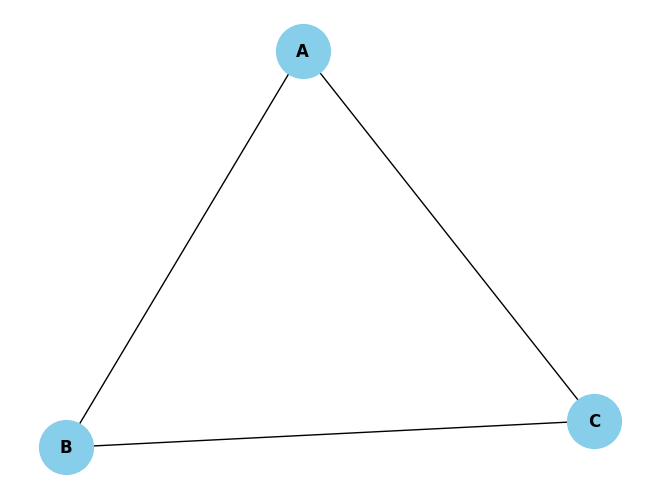

In [4]:
# Multigraph

multlgraph = nx.Graph()

multlgraph.add_node('A')
multlgraph.add_node('B')
multlgraph.add_node('C')

multlgraph.add_edge('A', 'B')
multlgraph.add_edge('B', 'C')
multlgraph.add_edge('A', 'C')

to_graph(multlgraph)

In [5]:
# Multigraph - Adjacency Matrix / Incident Matrix

to_am(multlgraph)
to_im(multlgraph)

Adjacency Matrix:


,A,B,C
A,0.0,1.0,1.0
B,1.0,0.0,1.0
C,1.0,1.0,0.0


Incident Matrix:


,A-B,A-C,B-C
A,-1.0,-1.0,0.0
B,1.0,0.0,-1.0
C,0.0,1.0,1.0


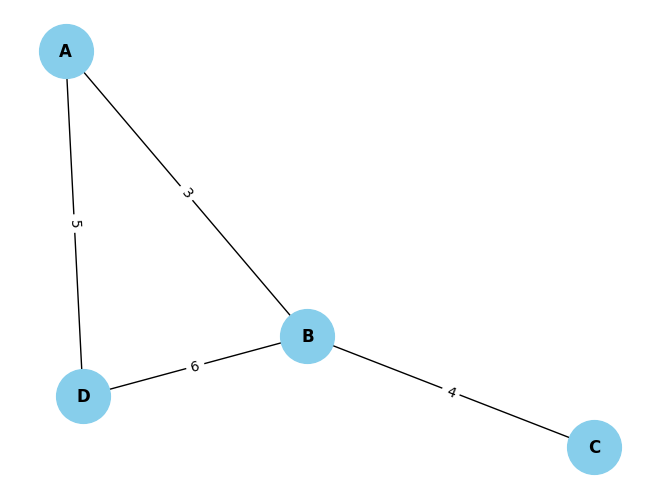

In [6]:
# Weighted Graph

weighted_graph = nx.Graph()

weighted_graph.add_node('A')
weighted_graph.add_node('B')
weighted_graph.add_node('C')
weighted_graph.add_node('D')

weighted_graph.add_edge('A', 'B', weight = 3)
weighted_graph.add_edge('B', 'C', weight = 4)
weighted_graph.add_edge('A', 'D', weight = 5)
weighted_graph.add_edge('B', 'D', weight = 6)

to_graph(weighted_graph, True)

In [7]:
# Weighted Graph - Adjacency Matrix / Incident Matrix

to_am(weighted_graph)
to_im(weighted_graph)

Adjacency Matrix:


,A,B,C,D
A,0.0,3.0,0.0,5.0
B,3.0,0.0,4.0,6.0
C,0.0,4.0,0.0,0.0
D,5.0,6.0,0.0,0.0


Incident Matrix:


,A-B,A-D,B-C,B-D
A,-1.0,-1.0,0.0,0.0
B,1.0,0.0,-1.0,-1.0
C,0.0,0.0,1.0,0.0
D,0.0,1.0,0.0,1.0


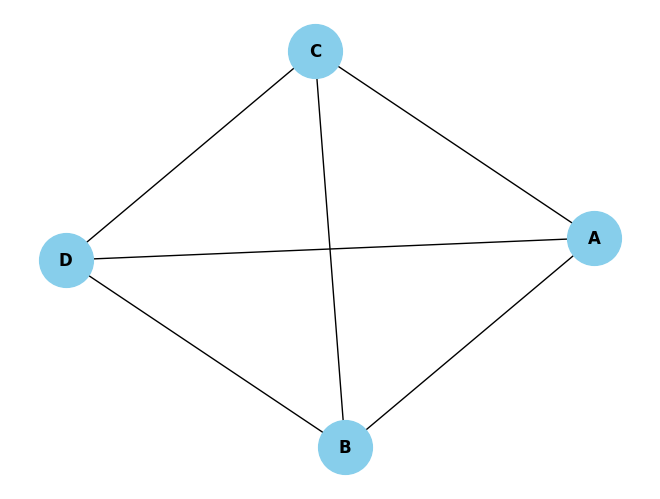

In [8]:
# Complete Graph

complete_graph = nx.Graph()

complete_graph.add_node('A')
complete_graph.add_node('B')
complete_graph.add_node('C')
complete_graph.add_node('D')

complete_graph.add_edge('A', 'B')
complete_graph.add_edge('A', 'C')
complete_graph.add_edge('A', 'D')
complete_graph.add_edge('B', 'C')
complete_graph.add_edge('B', 'D')
complete_graph.add_edge('C', 'D')

to_graph(complete_graph)

In [9]:
# Complete Graph - Adjacency Matrix / Incident Matrix

to_am(complete_graph)
to_im(complete_graph)

Adjacency Matrix:


,A,B,C,D
A,0.0,1.0,1.0,1.0
B,1.0,0.0,1.0,1.0
C,1.0,1.0,0.0,1.0
D,1.0,1.0,1.0,0.0


Incident Matrix:


,A-B,A-C,A-D,B-C,B-D,C-D
A,-1.0,-1.0,-1.0,0.0,0.0,0.0
B,1.0,0.0,0.0,-1.0,-1.0,0.0
C,0.0,1.0,0.0,1.0,0.0,-1.0
D,0.0,0.0,1.0,0.0,1.0,1.0


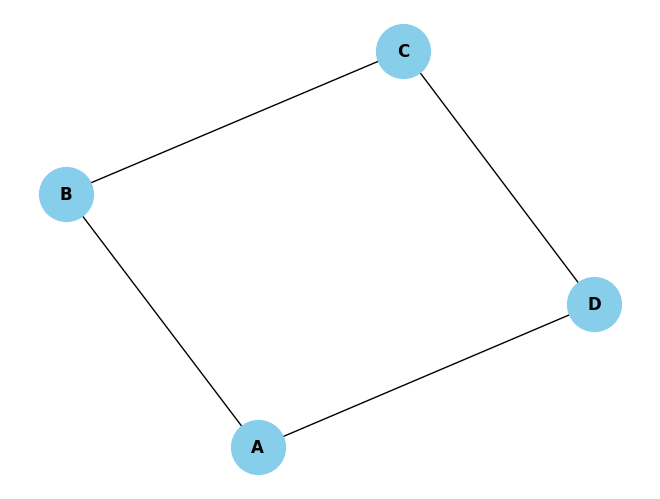

In [10]:
# Cycle

cycle = nx.Graph()

cycle.add_node('A')
cycle.add_node('B')
cycle.add_node('C')
cycle.add_node('D')


cycle.add_edge('A', 'B')
cycle.add_edge('B', 'C')
cycle.add_edge('C', 'D')
cycle.add_edge('A', 'D')


to_graph(cycle)

In [11]:
# Cycle - Adjacency Matrix / Incident Matrix

to_am(cycle)
to_im(cycle)

Adjacency Matrix:


,A,B,C,D
A,0.0,1.0,0.0,1.0
B,1.0,0.0,1.0,0.0
C,0.0,1.0,0.0,1.0
D,1.0,0.0,1.0,0.0


Incident Matrix:


,A-B,A-D,B-C,C-D
A,-1.0,-1.0,0.0,0.0
B,1.0,0.0,-1.0,0.0
C,0.0,0.0,1.0,-1.0
D,0.0,1.0,0.0,1.0


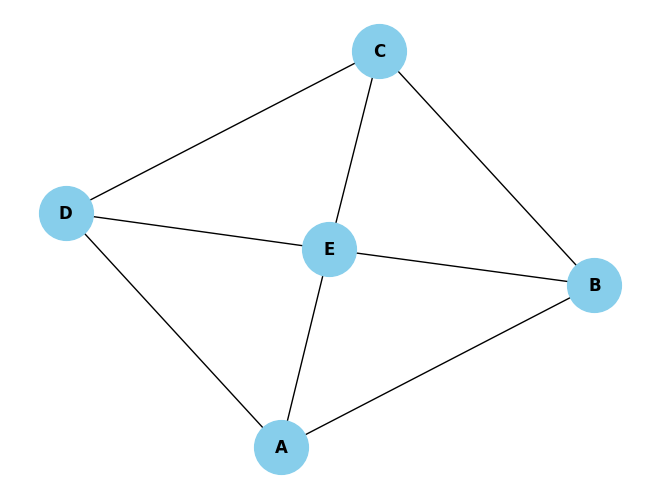

In [12]:
# Wheel

wheel = nx.Graph()

wheel.add_node('A')
wheel.add_node('B')
wheel.add_node('C')
wheel.add_node('D')
wheel.add_node('E')

wheel.add_edge('A', 'B')
wheel.add_edge('B', 'C')
wheel.add_edge('C', 'D')
wheel.add_edge('A', 'D')
wheel.add_edge('A', 'E')
wheel.add_edge('B', 'E')
wheel.add_edge('C', 'E')
wheel.add_edge('D', 'E')


to_graph(wheel)

In [13]:
# Wheel - Adjacency Matrix / Incident Matrix

to_am(wheel)
to_im(wheel)

Adjacency Matrix:


,A,B,C,D,E
A,0.0,1.0,0.0,1.0,1.0
B,1.0,0.0,1.0,0.0,1.0
C,0.0,1.0,0.0,1.0,1.0
D,1.0,0.0,1.0,0.0,1.0
E,1.0,1.0,1.0,1.0,0.0


Incident Matrix:


,A-B,A-D,A-E,B-C,B-E,C-D,C-E,D-E
A,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
B,1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0
C,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0
D,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0
E,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


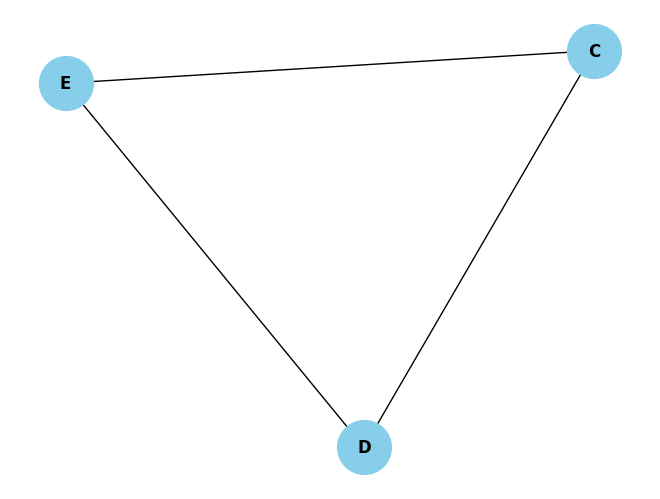

In [14]:
# Subgraph

subgraph = wheel.subgraph(['C', 'D', 'E'])


to_graph(subgraph)

In [15]:
# Subgraph - Adjacency Matrix / Incident Matrix

to_am(subgraph)
to_im(subgraph)

Adjacency Matrix:


,C,D,E
C,0.0,1.0,1.0
D,1.0,0.0,1.0
E,1.0,1.0,0.0


Incident Matrix:


,C-D,C-E,D-E
C,-1.0,-1.0,0.0
D,1.0,0.0,-1.0
E,0.0,1.0,1.0
